In [6]:
from argparse import ArgumentParser
import torch
import numpy as np

import pytorch_lightning as pl
import spacetimeformer as stf
import pandas as pd

from pytorch_lightning.loggers import WandbLogger
import time
import tqdm
from itertools import chain
from data.bats_dataset import BatsCSVDataset
from pytorch_lightning.callbacks import LearningRateMonitor
from utils import *

In [7]:
ignore_cols = ["FreqLedge","AmpK@end", "Fc", "FBak15dB  ", "FBak32dB", "EndF", "FBak20dB", "LowFreq", "Bndw20dB", 
               "CallsPerSec", "EndSlope", "SteepestSlope", "StartSlope", "Bndw15dB", "HiFtoUpprKnSlp", "HiFtoKnSlope", 
               "DominantSlope", "Bndw5dB", "PreFc500", "PreFc1000", "PreFc3000", "KneeToFcSlope", "TotalSlope", 
               "PreFc250", "CallDuration", "CummNmlzdSlp", "DurOf32dB", "SlopeAtFc", "LdgToFcSlp", "DurOf20dB", "DurOf15dB", 
               "TimeFromMaxToFc", "KnToFcDur", "HiFtoFcExpAmp", "AmpKurtosis", "LowestSlope", "KnToFcDmp", "HiFtoKnExpAmp", 
               "DurOf5dB", "KnToFcExpAmp", "RelPwr3rdTo1st", "LnExpB_StartAmp", "Filter", "HiFtoKnDmp", "LnExpB_EndAmp", 
               "HiFtoFcDmp", "AmpSkew", "LedgeDuration", "KneeToFcResidue", "PreFc3000Residue", "AmpGausR2", "PreFc1000Residue", 
               "Amp1stMean", "LdgToFcExp", "FcMinusEndF", "Amp4thMean", "HiFtoUpprKnExp", "HiFtoKnExp", "KnToFcExp", "UpprKnToKnExp", 
               "Kn-FcCurviness", "Amp2ndMean", "Quality", "HiFtoFcExp", "LnExpA_EndAmp", "RelPwr2ndTo1st", "LnExpA_StartAmp", 
               "HiFminusStartF", "Amp3rdMean", "PreFc500Residue", "Kn-FcCurvinessTrndSlp", "PreFc250Residue", "AmpVariance", "AmpMoment", 
               "meanKn-FcCurviness", "MinAccpQuality", "AmpEndLn60ExpC", "AmpStartLn60ExpC", "Preemphasis", "MaxSegLnght" ,"Max#CallsConsidered" ]

ignore_cols += ["Filename", "NextDirUp", 'Path', 'Version', 'Filter', 'Preemphasis', 'MaxSegLnght', "ParentDir"]

data_module = stf.data.DataModule(
    datasetCls = BatsCSVDataset,
    dataset_kwargs = {
        "root_path": "/home/vdesai/bats_data/training_files/splits",
        "prefix": "split",
        "ignore_cols": ignore_cols,
        "time_col_name": "TimeIndex",
        "val_split": 0.05,
        "test_split": 0.05,
        "context_points": 57,
        "target_points": 1,
    },
    batch_size = 128,
    workers = 4,
    overfit = False
)

In [8]:
model = stf.spacetimeformer_model.Spacetimeformer_Forecaster(max_seq_len = 58)

Forecaster
	L2: 0.001
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=200, out_features=200, bias=True)
  (key_projection): Linear(in_features=200, out_features=200, bias=True)
  (value_projection): Linear(in_features=200, out_features=200, bias=True)
  (out_projection): Linear(in_features=200, out_features=200, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=200, out_features=200, bias=True)
  (key_projection): Linear(in_features=200, out_features=200, bias=True)
  (value_projection): Linear(in_features=200, out_features=200, bias=True)
  (out_projection): Linear(in_features=200, out_features=200, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
L

In [9]:
trainer = pl.Trainer(
        gpus=0,
        logger=None,
        accelerator='gpu',
        devices = 1,
        gradient_clip_val=1,
        gradient_clip_algorithm="norm",
        overfit_batches=0,
        accumulate_grad_batches=4,
        sync_batchnorm=True,
        limit_val_batches=None,
        max_epochs=1,
        callbacks =None
)


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=00-val_loss=0.47-train_loss=0.56.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=01-val_loss=0.46-train_loss=0.80.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=02-val_loss=0.45-train_loss=0.40.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=03-val_loss=0.45-train_loss=0.56.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=04-val_loss=0.45-train_loss=0.47.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=05-val_loss=0.45-train_loss=0.34.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=06-val_loss=0.45-train_loss=0.43.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=07-val_loss=0.45-train_loss=0.56.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=08-val_loss=0.45-train_loss=0.42.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=09-val_loss=0.45-train_loss=0.37.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=10-val_loss=0.45-train_loss=0.59.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=11-val_loss=0.45-train_loss=0.35.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
LocalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projec

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=13-val_loss=0.45-train_loss=0.56.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=14-val_loss=0.45-train_loss=0.43.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=15-val_loss=0.45-train_loss=0.43.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=16-val_loss=0.45-train_loss=0.48.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=17-val_loss=0.45-train_loss=0.62.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=18-val_loss=0.45-train_loss=0.97.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


bats_transformer_epochs_eval_seed_1-epoch=19-val_loss=0.45-train_loss=1.57.ckpt
Forecaster
	L2: 1e-06
	Linear Window: 0
	Linear Shared Weights: False
	RevIN: False
	Decomposition: False
GlobalSelfAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_features=100, bias=True)
  (dropout_qkv): Dropout(p=0.0, inplace=False)
)
GlobalCrossAttn: AttentionLayer(
  (inner_attention): PerformerAttention(
    (kernel_fn): ReLU()
  )
  (query_projection): Linear(in_features=100, out_features=20, bias=True)
  (key_projection): Linear(in_features=100, out_features=20, bias=True)
  (value_projection): Linear(in_features=100, out_features=20, bias=True)
  (out_projection): Linear(in_features=20, out_fea

{'ok': True,
 'result': {'message_id': 12,
  'from': {'id': 6729655835,
   'is_bot': True,
   'first_name': 'bats-bot',
   'username': 'stanford_bats_bot'},
  'chat': {'id': 5130592026,
   'first_name': 'Varun',
   'last_name': 'Desai',
   'username': 'varundesai10',
   'type': 'private'},
  'date': 1710830962,
  'photo': [{'file_id': 'AgACAgUAAxkDAAMMZfk1cucDaP8y_fBdLALGuL0tZjsAAie5MRsmX8hXJq30IaLB-f8BAAMCAANzAAM0BA',
    'file_unique_id': 'AQADJ7kxGyZfyFd4',
    'file_size': 807,
    'width': 90,
    'height': 67},
   {'file_id': 'AgACAgUAAxkDAAMMZfk1cucDaP8y_fBdLALGuL0tZjsAAie5MRsmX8hXJq30IaLB-f8BAAMCAANtAAM0BA',
    'file_unique_id': 'AQADJ7kxGyZfyFdy',
    'file_size': 6809,
    'width': 320,
    'height': 240},
   {'file_id': 'AgACAgUAAxkDAAMMZfk1cucDaP8y_fBdLALGuL0tZjsAAie5MRsmX8hXJq30IaLB-f8BAAMCAAN4AAM0BA',
    'file_unique_id': 'AQADJ7kxGyZfyFd9',
    'file_size': 16820,
    'width': 640,
    'height': 480}]}}

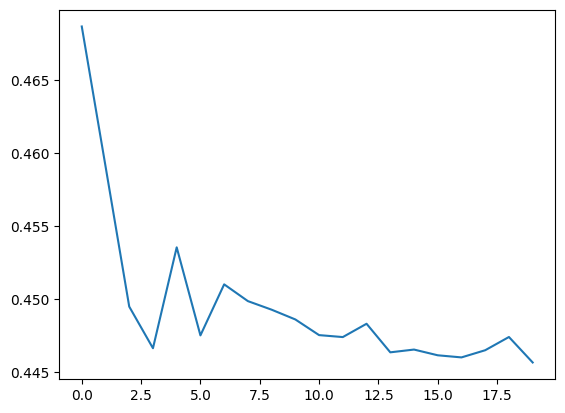

In [13]:
import re
import os
import matplotlib.pyplot as plt

MODEL_PATH = '/home/vdesai/bats_data/models'
grepstring = 'bats_transformer_epochs_eval_seed_1'


p = re.compile(f'{grepstring}-epoch=(\d+)-')

# List and sort files that match the pattern
files = [file for file in os.listdir(MODEL_PATH) if p.match(file)]
files = sorted(files, key=lambda x: int(p.search(x).group(1)))

epochs = []
losses = []

for file in files:
    print(file)
    # Construct the full path to the file
    full_path = os.path.join(MODEL_PATH, file)
    # Load the model from checkpoint
    model = model.load_from_checkpoint(checkpoint_path=full_path)  # Ensure Model is the correct class name
    model.configure_optimizers()
    
    # Extract the epoch number from the file name
    epoch_no = int(p.search(file).group(1))
    state_dict = trainer.validate(model, data_module)
    val_loss = state_dict[0]['val_loss'];

    epochs += [epoch_no]
    losses += [val_loss]

plt.plot(epochs, losses)
plt.savefig("temp.png")
send_telegram_image("temp.png")



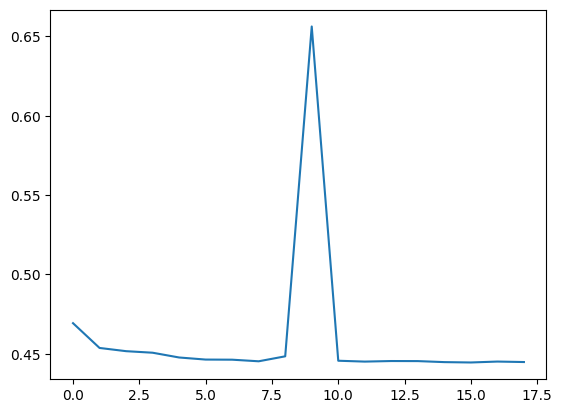

In [12]:
plt.plot(epochs, losses)

In [ ]:
send_telegram_message("we're doing it for the fam, homeboy")